# Generating synthetic time series

Based on:

* Linear and nonlinear time series generated according to "FEDD: Feature Extraction for Explicit Concept Drift Detection in Time Series"
* Abrupt, incremental and gradual drifts implemented according to "Handling Concept Drift in Global Time Series Forecasting"
* Time series with seasonality genereted in "Real-time Drift Detection on Time-series Data" (using Fourier components) - there were compoments for short and long period, they fitted weekdays-weekends and holidays.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
import os

from src.data import AutoregressiveModel, NonlinearModel, AutoregressiveSeasonalModel

In [2]:
CONCEPT_LENGTH = 3000
SWITCH_LENGTH = 300
RANDOM_SEEDS = [0, 1, 2]
ML_EXPERIMENTS_RANDOM_SEEDS = [10, 11, 12]

In [3]:
path = '../data/raw/2024_04_11_artificial_data'
ml_experiments_path = '../data/raw/2024_07_04_artificial_data'

os.makedirs(path, exist_ok=True)
os.makedirs(ml_experiments_path, exist_ok=True)

### Linear model (AR)

In [4]:
linear_1 = [
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]), 
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.3, 1.4, 0.4, -0.5]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([1.5, -0.4, -0.3, 0.2]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 3.5, 'ar_param': np.array([-0.1, 1.4, 0.4, -0.7]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.3, 1.4, 0.4, -0.5]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 0.5, 'ar_param': np.array([1.1, -0.6, 0.8, -0.5, -0.1, 0.3]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
]

In [5]:
linear_2 = [
    {
        'sigma': 0.5, 'ar_param': np.array([1.1, -0.6, 0.8, -0.5, -0.1, 0.3]), 
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.1, 1.2, 0.4, 0.3, -0.2, -0.6]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([1.2, -0.4, -0.3, 0.7, -0.6, 0.4]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 3.5, 'ar_param': np.array([-0.1, 1.1, 0.5, 0.2, -0.2, -0.5]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.3, 1.4, 0.4, -0.5]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([1.1, -0.6, 0.8, -0.5, -0.1, 0.3]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 3.5, 'ar_param': np.array([1.2, -0.4, -0.3, 0.7, -0.6, 0.4]), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
]

In [6]:
models = [
    ('linear_1', linear_1),
    ('linear_2', linear_2)
]

In [8]:
for name, param in models:
    for random_seed in RANDOM_SEEDS:
        np.random.seed(random_seed)
        ar = AutoregressiveModel(params=param)
        df = ar.generate()
        df.to_csv(os.path.join(path, f'{name}__{random_seed}.csv'))

In [7]:
for name, param in models:
    for random_seed in ML_EXPERIMENTS_RANDOM_SEEDS:
        np.random.seed(random_seed)
        ar = AutoregressiveModel(params=param)
        df = ar.generate()
        df.to_csv(os.path.join(ml_experiments_path, f'{name}__{random_seed}.csv'))

### Nonlinear model

In [8]:
nonlinear_1 = [
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2]), 'ar_exp_param': np.array([0.8, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.3, 1.4]), 'ar_exp_param': np.array([0.4, -0.5]),
        'length': CONCEPT_LENGTH,
    },
    {
        'sigma': 1.5, 'ar_param': np.array([1.4, -0.4]), 'ar_exp_param': np.array([-0.3, 0.2]),
        'length': CONCEPT_LENGTH,
    },
    {
        'sigma': 3.5, 'ar_param': np.array([-0.3, 1.4]), 'ar_exp_param': np.array([0.4, -0.7]), 
        'length': CONCEPT_LENGTH,
    },
    {
        'sigma': 0.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([0.9, -0.2, 0.8, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([-0.3, 1.4, 0.4, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([0.9, -0.2]), 'ar_exp_param': np.array([0.8, -0.5]),
        'length': CONCEPT_LENGTH
    },
]

In [9]:
nonlinear_2 = [
    {
        'sigma': 0.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([0.9, -0.2, 0.8, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([-0.3, 1.4, 0.4, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([1.5, -0.4, -0.3, 0.2]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 3.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([-0.1, 1.4, 0.4, -0.7]), 
        'length': CONCEPT_LENGTH, 
    },
    {
        'sigma': 1.5, 'ar_param': np.array([1.4, -0.4]), 'ar_exp_param': np.array([-0.3, 0.2]),
        'length': CONCEPT_LENGTH,
    },
    {
        'sigma': 0.5, 'ar_param': np.array([]), 'ar_exp_param': np.array([-0.1, 1.2, 0.4, -0.5]),
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2]), 'ar_exp_param': np.array([0.8, -0.5]),
        'length': CONCEPT_LENGTH
    }
]

In [10]:
models = [
    ('nonlinear_1', nonlinear_1),
    ('nonlinear_2', nonlinear_2)
]

In [12]:
for name, param in models:
    for random_seed in RANDOM_SEEDS:
        np.random.seed(random_seed)
        nr = NonlinearModel(params=param)
        df = nr.generate()
        df.to_csv(os.path.join(path, f'{name}__{random_seed}.csv'))

In [11]:
for name, param in models:
    for random_seed in ML_EXPERIMENTS_RANDOM_SEEDS:
        np.random.seed(random_seed)
        nr = NonlinearModel(params=param)
        df = nr.generate()
        df.to_csv(os.path.join(ml_experiments_path, f'{name}__{random_seed}.csv'))

### Autoregresive seasonal model (ARX)

In [12]:
def week_seasonality(x, scale=1.0):
    # implements day seasonality
    x = x % 168 # hour of a week
    d = x // 24 # day of week

    val = 0
    # weekly seasonality
    if d == 1:
        val += 1
    elif d in [2, 3]:
        val += 1.5
    elif d in [4, 5]:
        val += 2.5
    elif d == 6:
        val += 1.5
    return val * scale

In [13]:
def week_seasonality_2(x, concept, scale=1.0):
    # implements day and hour seasonality

    x = x % 168 # hour of a week
    d = x // 24 # day of week
    g = x % 24 # hour of a day

    if concept == 1:
        val = 0
        # weekly seasonality
        if d == 1:
            val += 1
        elif d in [2, 3]:
            val += 1.5
        elif d in [4, 5]:
            val += 2.5
        elif d == 6:
            val += 1.5
        return val * scale

    elif concept == 2:
        val = 0
        # weekly seasonality
        if d > 1:
            val += 1.5
        # daily seasonality
        if g > 6 and g < 12:
            val += 0.5
        elif g >= 12 and g < 17:
            val += 1.5
        elif g >= 17:
            val += 2
        return val * scale

    elif concept == 3:
        val = 0
        # weekly seasonality
        if d > 2:
            val += 2
        # daily seasonality
        if g > 6 and g < 10:
            val += 0.5
        elif g >= 10 and g < 14:
            val += 1.5
        elif g >= 14:
            val += 2
        return val * scale

    else:
        return 0

In [14]:
def week_seasonality_3(x, concept, scale=1.0):
    # implements day and hour seasonality

    x = x % 168 # hour of a week
    d = x // 24 # day of week
    g = x % 24 # hour of a day

    if concept == 1:
        val = 0
        # weekly seasonality
        if d in [4, 5]:
            val += 3
        elif d == 6:
            val += 0.5
        return val * scale

    elif concept == 2:
        val = 0
        # weekly seasonality
        if d in [2, 3]:
            val += 1
        elif d in [5, 6]:
            val -= 1
        return val * scale

    elif concept == 3:
        val = 0
        # weekly seasonality
        if d in [2, 3]:
            val += 1
        elif d in [5, 6]:
            val -= 1
        # daily seasonality
        if g >= 12 and g < 17:
            val += 1.5
        elif g >= 17:
            val += 2
        return val * scale

    else:
        return 0

In [15]:
linear_seasonal_1 = [
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 
        'length': CONCEPT_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.3, 1.4, 0.4, -0.5]) * 0.9, 'seasonal_function': week_seasonality,
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.0, 'ar_param': np.array([1.5, -0.4, -0.3, 0.2]) * 0.9, 'seasonal_function': week_seasonality,
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([-0.1, 1.4, 0.4, -0.7]) * 0.9, 'seasonal_function': week_seasonality,
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 0.5, 'ar_param': np.array([-0.1, 1.1, 0.5, 0.2, -0.2, -0.5]) * 0.8, 'seasonal_function': week_seasonality, 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([1.2, -0.4, -0.3, 0.7, -0.6, 0.4]) * 0.8, 'seasonal_function': partial(week_seasonality, scale=1.5),  
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality, scale=1.5),  
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
]

In [16]:
linear_seasonal_2 = [
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 
        'length': CONCEPT_LENGTH, 'constant': 10
    },
    {
        'sigma': 0.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=1), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=2), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 2.5, 'ar_param': np.array([1.1, -0.6, 0.8, -0.5, -0.1, 0.3]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=3),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([1.1, -0.6, 0.8, -0.5, -0.1, 0.3]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=3, scale=2),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH, 'constant': -20
    }, 
    {
        'sigma': 0.5, 'ar_param': np.array([1.2, -0.4, -0.3, 0.7, -0.6, 0.4]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=1, scale=1.5), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH, 'constant': 10
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH, 'constant': 15
    },
]

In [17]:
linear_seasonal_3 = [
    {
        'sigma': 1.5, 'ar_param': np.array([]), 
        'length': CONCEPT_LENGTH, 'constant': 0.5
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=1, scale=1), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_2, concept=1, scale=-1), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH, 'constant': 30
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.6, 'seasonal_function': partial(week_seasonality_2, concept=3, scale=3),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    }, 
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_2, concept=3, scale=-3),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH, 'constant': 30
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_2, concept=2, scale=6), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH, 'constant': 10
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_2, concept=2, scale=1.5), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH, 'constant': 15
    },
]

In [18]:
linear_seasonal_4 = [
    {
        'sigma': 2.5, 'ar_param': np.array([]), 
        'length': CONCEPT_LENGTH, 'constant': 0.5
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_3, concept=1, scale=5), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_3, concept=2, scale=5), 
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'incremental', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([]), 'seasonal_function': partial(week_seasonality_3, concept=3, scale=5),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    }, 
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_3, concept=3, scale=1),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH
    },
    {
        'sigma': 1.5, 'ar_param': np.array([0.9, -0.2, 0.8, -0.5]) * 0.9, 'seasonal_function': partial(week_seasonality_3, concept=3, scale=-1.5),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH, 'constant': 15
    },
    {
        'sigma': 1.5, 'ar_param': np.array([1.2, -0.4, -0.3, 0.7, -0.6, 0.4]) * 0.9, 'seasonal_function': partial(week_seasonality_3, concept=3, scale=-1.5),
        'length': CONCEPT_LENGTH, 'drift_switch_type': 'gradual', 'drift_switch_length': SWITCH_LENGTH, 'constant': 15
    },
]

In [19]:
models = [
    ('linear_seasonal_1', linear_seasonal_1),
    ('linear_seasonal_2', linear_seasonal_2),
    ('linear_seasonal_3', linear_seasonal_3),
    ('linear_seasonal_4', linear_seasonal_4)
]

In [21]:
for name, param in models:
    for random_seed in RANDOM_SEEDS:
        np.random.seed(random_seed)
        ars = AutoregressiveSeasonalModel(params=param)
        df = ars.generate()
        df.to_csv(os.path.join(path, f'{name}__{random_seed}.csv'))

In [20]:
for name, param in models:
    for random_seed in ML_EXPERIMENTS_RANDOM_SEEDS:
        np.random.seed(random_seed)
        ars = AutoregressiveSeasonalModel(params=param)
        df = ars.generate()
        df.to_csv(os.path.join(ml_experiments_path, f'{name}__{random_seed}.csv'))

#### Example plots

In [22]:
def plot_generated(df, param, title):
    plt.subplots(figsize=(12, 3))
    sns.lineplot(data=df, x='timestamp', y='value')

    x = 0
    for i in range(len(param)):
        if 'drift_switch_length' in param[i].keys() and i > 0:
            plt.axvspan(x, x + param[i]['drift_switch_length'], color='grey', alpha=0.3)

        if i < len(param) - 1:
            x += param[i]['length']
            plt.axvline(x=x, c='red', linestyle='--')

    plt.title(title)

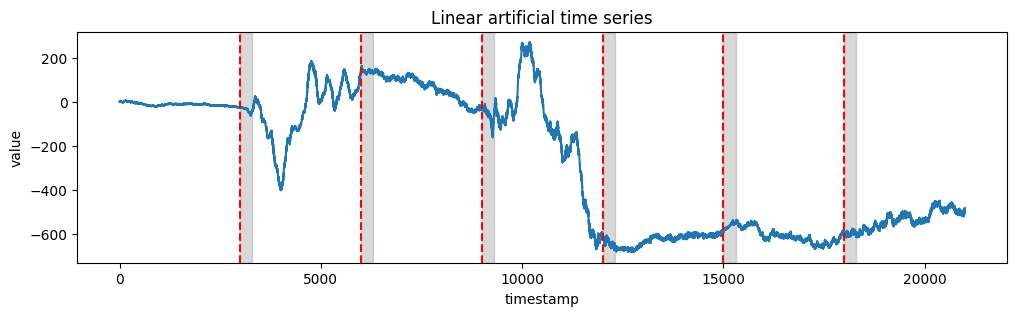

In [23]:
np.random.seed(RANDOM_SEEDS[0])
ar = AutoregressiveModel(params=linear_2)
df = ar.generate()

plot_generated(df, linear_2, 'Linear artificial time series')
plt.show()

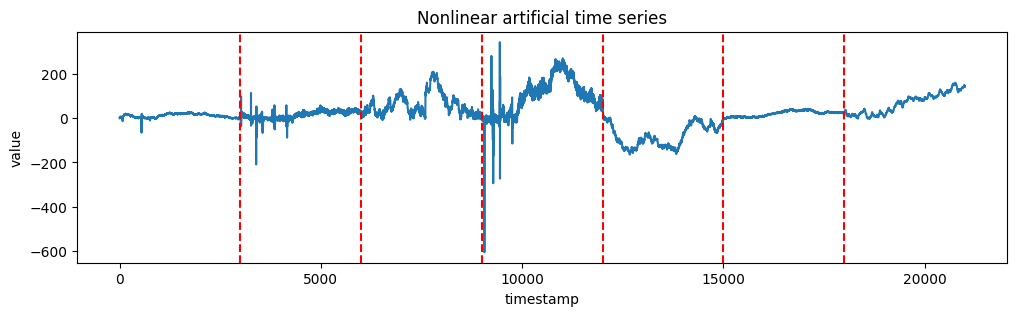

In [24]:
np.random.seed(RANDOM_SEEDS[0])
nr = NonlinearModel(params=nonlinear_2)
df = nr.generate()

plot_generated(df, nonlinear_2, 'Nonlinear artificial time series')

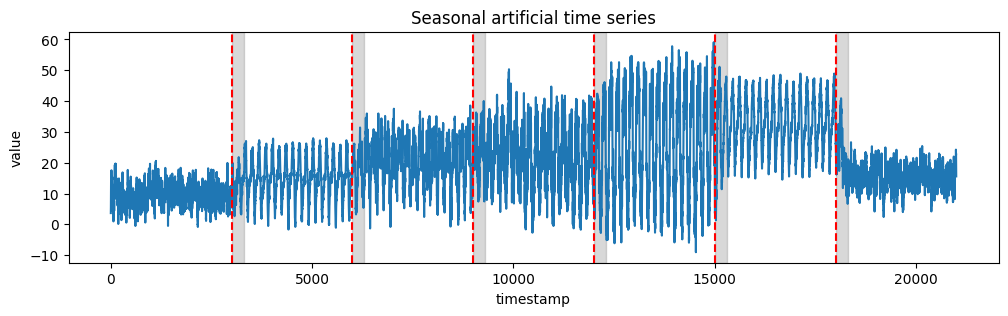

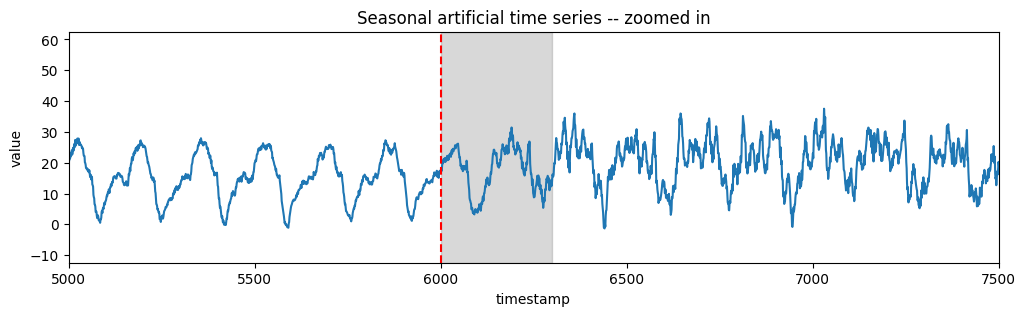

In [25]:
np.random.seed(RANDOM_SEEDS[0])
ars = AutoregressiveSeasonalModel(params=linear_seasonal_2)
df = ars.generate()

plot_generated(df, linear_seasonal_2, 'Seasonal artificial time series')
plt.show()

plot_generated(df, linear_seasonal_2, 'Seasonal artificial time series -- zoomed in')
plt.xlim(5000, 7500)
plt.show()

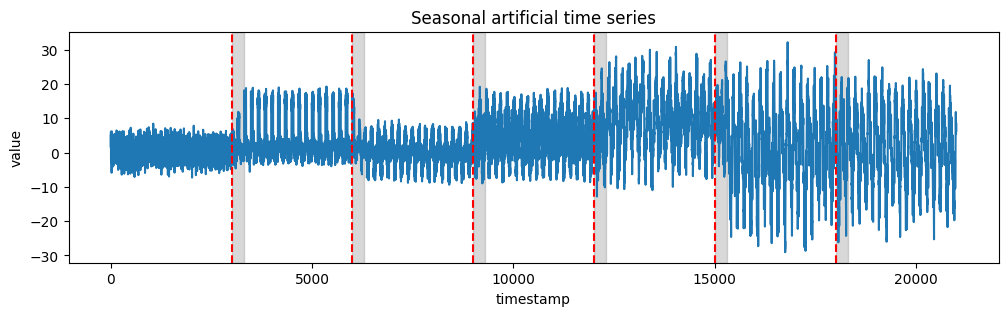

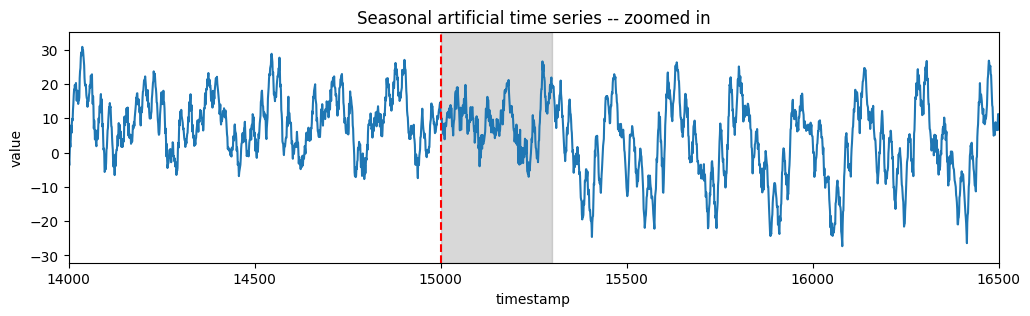

In [26]:
np.random.seed(RANDOM_SEEDS[0])
ars = AutoregressiveSeasonalModel(params=linear_seasonal_4)
df = ars.generate()

plot_generated(df, linear_seasonal_4, 'Seasonal artificial time series')
plt.show()

plot_generated(df, linear_seasonal_4, 'Seasonal artificial time series -- zoomed in')
plt.xlim(14000, 16500)
plt.show()